In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
data = {
    "Methods": ["MF [1]", "MLP [2]", "Paper's (zero-shot) [3]", "Paper's (few-shot) [3]", "Thu's OpenAI embedding", 
               "Thu's zero-shot GPT", "Thu's few-shot GPT", "Thu's OpenAI embedding", "Thu's zero-shot GPT",
               "Thu's few-shot GPT", "Thu's few-shot GPT (1 test/user)", "Thu's zero-shot GPT", "Thu's few-shot GPT", 
               "Thu's few-shot GPT (1 test/user)", "Thu's OpenAI embedding"],
    "Dataset": ["Unknown", "Unknown", "Unknown Amazon", "Unknown Amazon", "Small Amazon", 
                "Small Amazon", "Small Amazon", "Large Amazon", "Large Amazon", 
                "Large Amazon", "Large Amazon", "Small Amazon", "Small Amazon", 
                "Small Amazon", "Small Amazon"],
    "Features": ["title", "title", "title", "title", "title", "title", "title", 
                 "title", "title", "title", "title", "title, reviewText", "title, reviewText", 
                 "title, reviewText", "title, reviewText"],
    "RMSE": [1.1973, 1.3078, 1.4059, 1.0751, 1.6036, 1.3351, 1.9086, 0.6240, 
             1.1344, 0.7185, 0.6445, 1.3758, 1.9457, 0.6325, 0.8856],
    "MAE": [0.9461, 0.9597, 1.1861, 0.6977, 1.1429, 1.2609, 1.0714, 0.3107, 
            1.0118, 0.3259, 0.2226, 1.0118, 0.9286, 0.4, 0.4714]
}

df = pd.DataFrame(data)
df


,Methods,Dataset,Features,RMSE,MAE
0,MF [1],Unknown,title,1.1973,0.9461
1,MLP [2],Unknown,title,1.3078,0.9597
2,Paper's (zero-shot) [3],Unknown Amazon,title,1.4059,1.1861
3,Paper's (few-shot) [3],Unknown Amazon,title,1.0751,0.6977
4,Thu's OpenAI embedding,Small Amazon,title,1.6036,1.1429
5,Thu's zero-shot GPT,Small Amazon,title,1.3351,1.2609
6,Thu's few-shot GPT,Small Amazon,title,1.9086,1.0714
7,Thu's OpenAI embedding,Large Amazon,title,0.6240,0.3107
8,Thu's zero-shot GPT,Large Amazon,title,1.1344,1.0118
9,Thu's few-shot GPT,Large Amazon,title,0.7185,0.3259


Plot saved


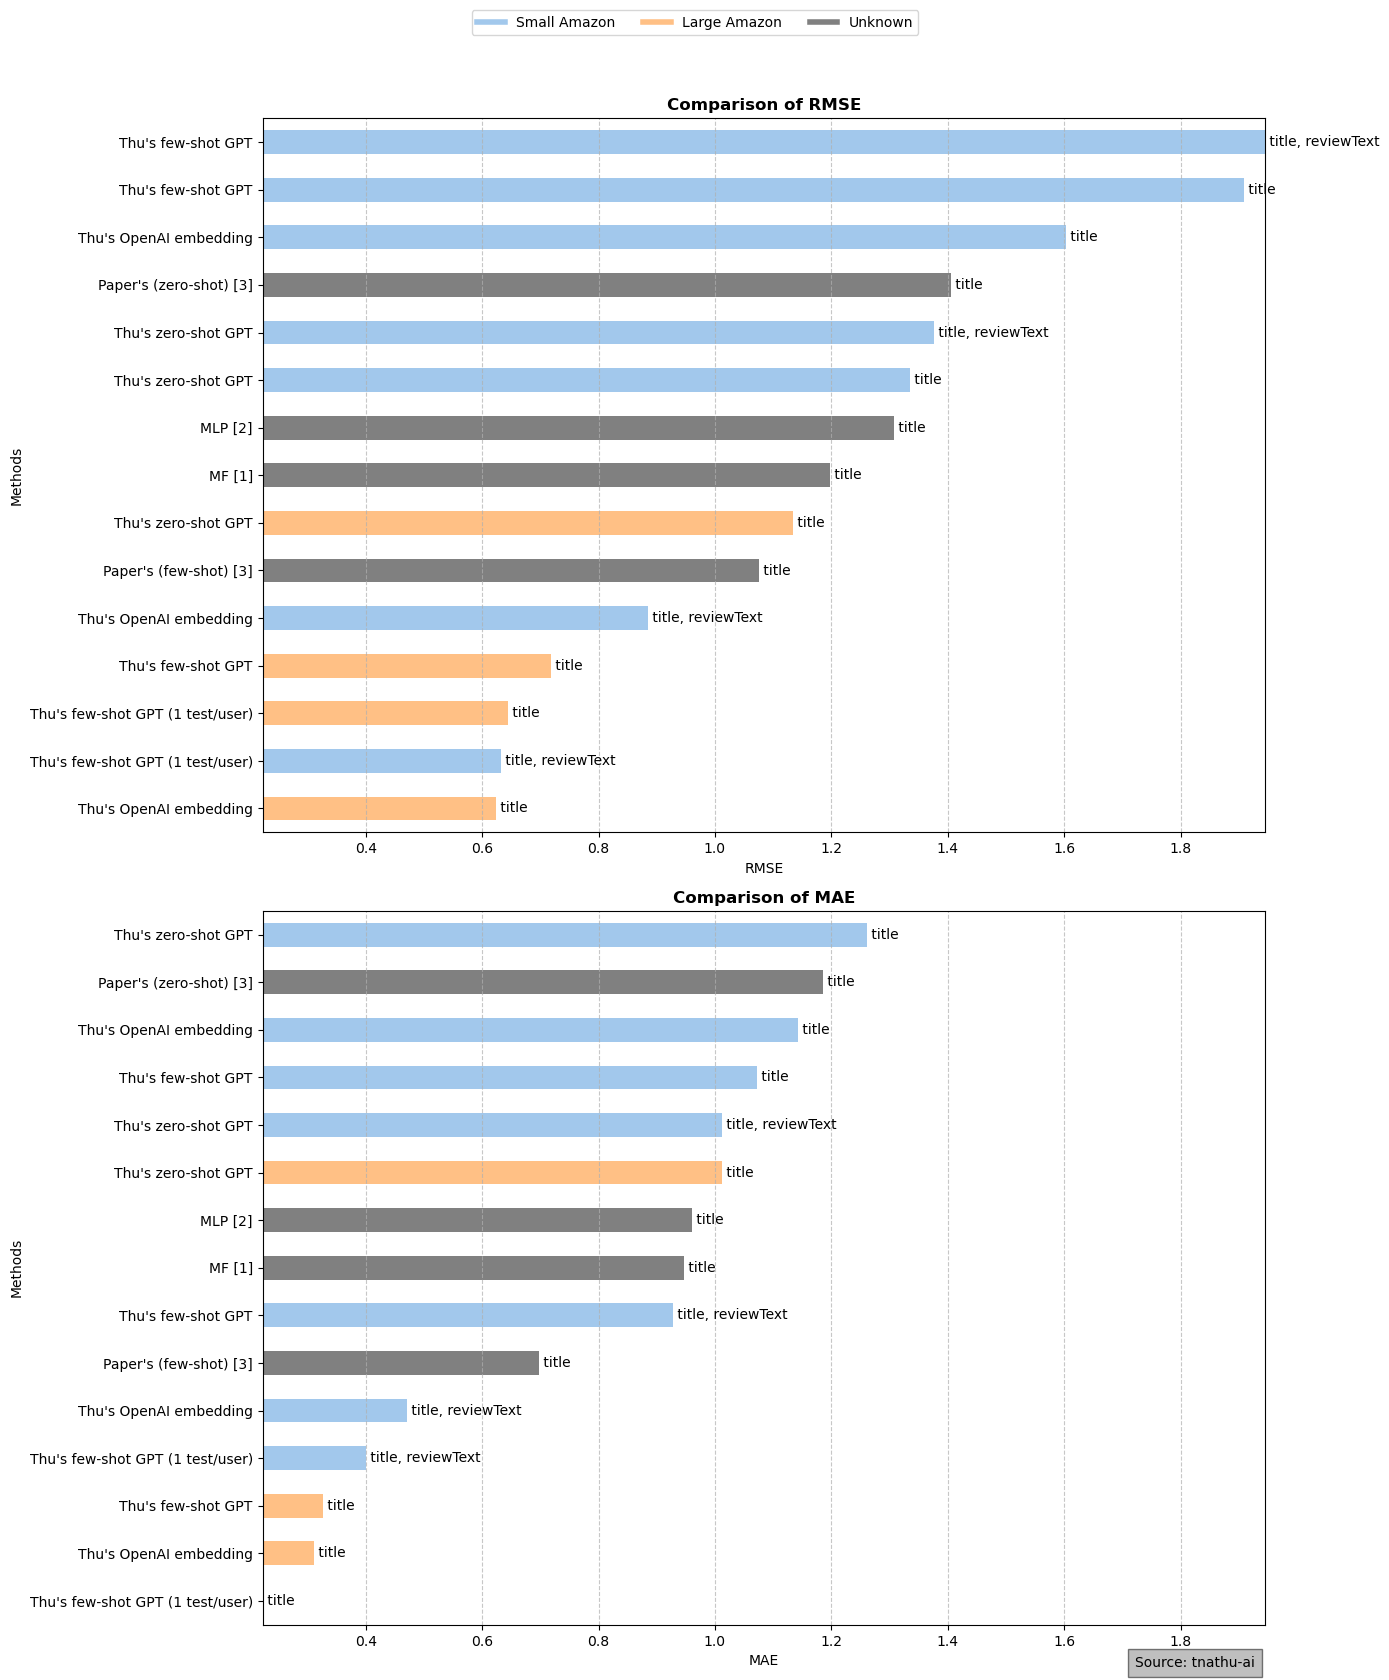

In [18]:
# Map the dataset to colors
df['color'] = df['Dataset'].map(color_map)

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())


# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 16))

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].set_xlabel("RMSE")
ax[0].set_ylabel("Methods")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].set_xlabel("MAE")
ax[1].set_ylabel("Methods")
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#A2C8EC', lw=4, label='Small Amazon'),
                   Line2D([0], [0], color='#FFC085', lw=4, label='Large Amazon'),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Citing the source to the right below the plot
plt.figtext(0.9, 0.01, "Source: tnathu-ai", ha="right", fontsize=10, bbox={"facecolor":"grey", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('../images/comparison_plot.png')
print(f"Plot saved")
plt.show()


  Using cached matplotlib-venn-0.11.9.tar.gz (30 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=1bd97dc6419a3056c9b2575abcddcd58018b7ea1a5eb83e635aacfcdebf896fb
  Stored in directory: /Users/tnathu-ai/Library/Caches/pip/wheels/f6/80/48/193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib_venn


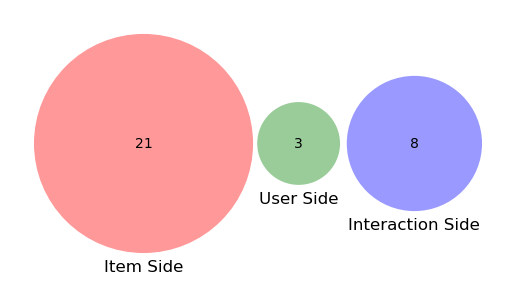

In [2]:
!pip install matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Columns related to the item side
ITEM_SIDE = [
    "asin",
    "title",
    "feature",
    "description",
    "price",
    "imageURL",
    "imageURLHighRes",
    "related",
    "salesRank",
    "brand",
    "categories",
    "tech1",
    "tech2",
    "similar",
    "also_buy",
    "also_view",
    "details",
    "main_cat",
    "similar_item",
    "date",
    "rank"
]

# Columns related to the interaction side
INTERACTION_SIDE = [
    "reviewText",
    "overall",
    "summary",
    "unixReviewTime",
    "reviewTime",
    "vote",
    "style",
    "image"
]

# Columns related to the user side
USER_SIDE = [
    "reviewerID",
    "reviewerName",
    "verified"
]

# Creating the Venn diagram
venn3([set(ITEM_SIDE), set(USER_SIDE), set(INTERACTION_SIDE)], ('Item Side', 'User Side', 'Interaction Side'))

# Displaying the Venn diagram
plt.show()


AttributeError: 'NoneType' object has no attribute 'set_text'

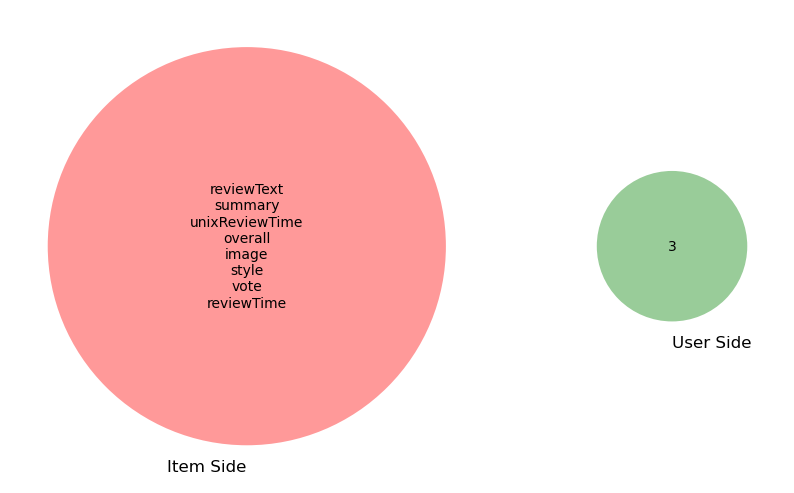

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sets for the Venn diagram
item_side = set([
    "asin", "title", "feature", "description", "price",
    "imageURL", "imageURLHighRes", "related", "salesRank", "brand",
    "categories", "tech1", "tech2", "similar", "also_buy", "also_view",
    "details", "main_cat", "similar_item", "date", "rank"
])

interaction_side = set([
    "reviewText", "overall", "summary", "unixReviewTime",
    "reviewTime", "vote", "style", "image"
])

user_side = set([
    "reviewerID", "reviewerName", "verified"
])

# Plot the Venn diagram
plt.figure(figsize=(10, 8))
venn = venn2([item_side, user_side], set_labels=('Item Side', 'User Side'))

# Assign interaction side to the intersection
venn.get_label_by_id('10').set_text('\n'.join(interaction_side))
venn.get_label_by_id('11').set_text('')  # Clear the intersection label

# Display the Venn diagram
plt.title("Venn Diagram of Item, User, and Interaction Sides")
plt.show()


AttributeError: 'NoneType' object has no attribute 'set_text'

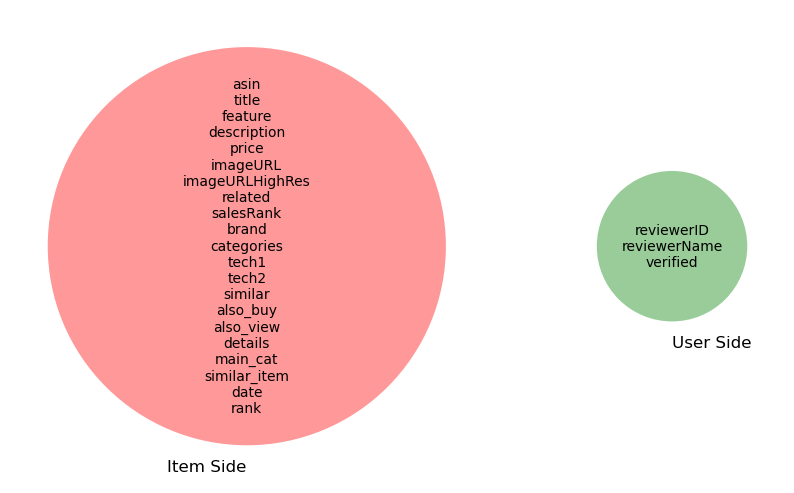

In [4]:
# Create the Venn diagram
plt.figure(figsize=(10, 7))
venn = venn2([set(ITEM_SIDE), set(USER_SIDE)], set_labels=("Item Side", "User Side"))

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side")
plt.show()

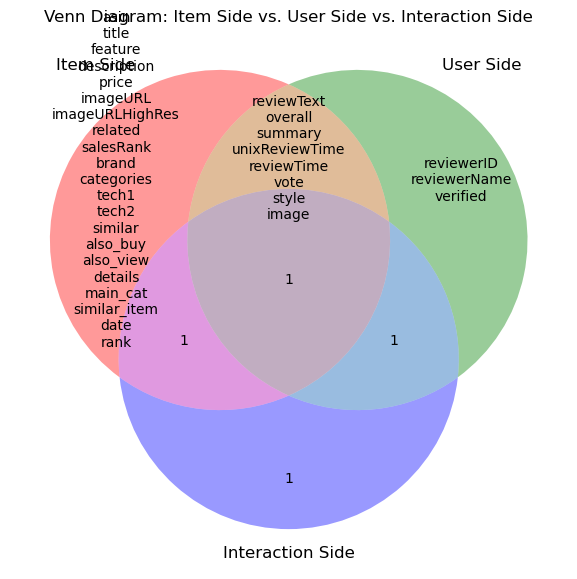

In [5]:
# Create the Venn diagram
plt.figure(figsize=(10, 7))
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=("Item Side", "User Side", "Interaction Side"))

# Add data to the Venn diagram sectors
venn.get_label_by_id('100').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('010').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('110').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side vs. Interaction Side")
plt.show()

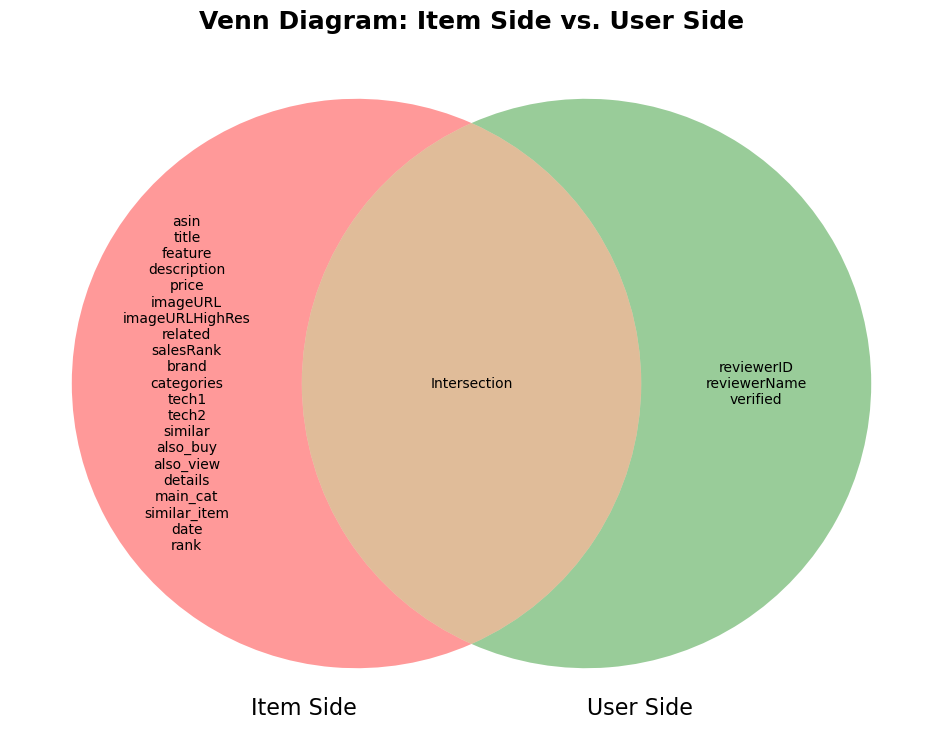

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Constants for item side and user side
ITEM_SIDE = [
    'asin', 
    'title', 
    'feature', 
    'description', 
    'price', 
    'imageURL', 
    'imageURLHighRes', 
    'related', 
    'salesRank', 
    'brand', 
    'categories', 
    'tech1', 
    'tech2', 
    'similar', 
    'also_buy', 
    'also_view', 
    'details', 
    'main_cat', 
    'similar_item', 
    'date', 
    'rank'
]

USER_SIDE = [
    'reviewerID', 
    'reviewerName', 
    'verified'
]

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('Intersection')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


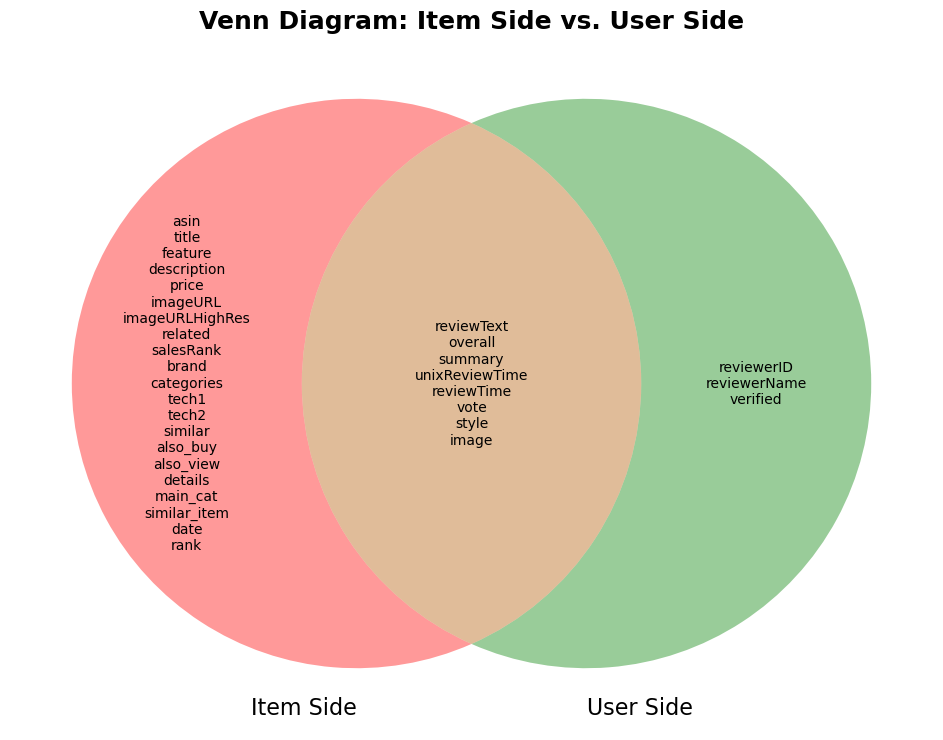

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Constants for item side, user side, and interaction side
ITEM_SIDE = [
    'asin', 
    'title', 
    'feature', 
    'description', 
    'price', 
    'imageURL', 
    'imageURLHighRes', 
    'related', 
    'salesRank', 
    'brand', 
    'categories', 
    'tech1', 
    'tech2', 
    'similar', 
    'also_buy', 
    'also_view', 
    'details', 
    'main_cat', 
    'similar_item', 
    'date', 
    'rank'
]

USER_SIDE = [
    'reviewerID', 
    'reviewerName', 
    'verified'
]

INTERACTION_SIDE = [
    'reviewText', 
    'overall', 
    'summary', 
    'unixReviewTime', 
    'reviewTime', 
    'vote', 
    'style', 
    'image'
]

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


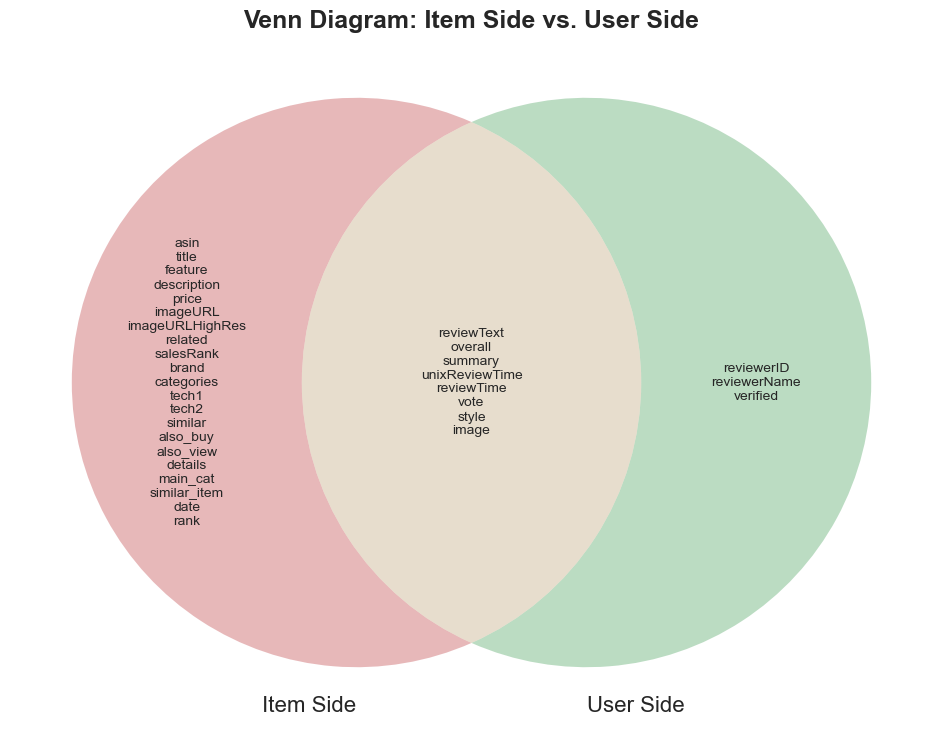

In [12]:
!pip install seaborn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Constants for item side, user side, and interaction side
ITEM_SIDE = [
    'asin', 
    'title', 
    'feature', 
    'description', 
    'price', 
    'imageURL', 
    'imageURLHighRes', 
    'related', 
    'salesRank', 
    'brand', 
    'categories', 
    'tech1', 
    'tech2', 
    'similar', 
    'also_buy', 
    'also_view', 
    'details', 
    'main_cat', 
    'similar_item', 
    'date', 
    'rank'
]

USER_SIDE = [
    'reviewerID', 
    'reviewerName', 
    'verified'
]

INTERACTION_SIDE = [
    'reviewText', 
    'overall', 
    'summary', 
    'unixReviewTime', 
    'reviewTime', 
    'vote', 
    'style', 
    'image'
]

# Set the seaborn style
sns.set(style="whitegrid")

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


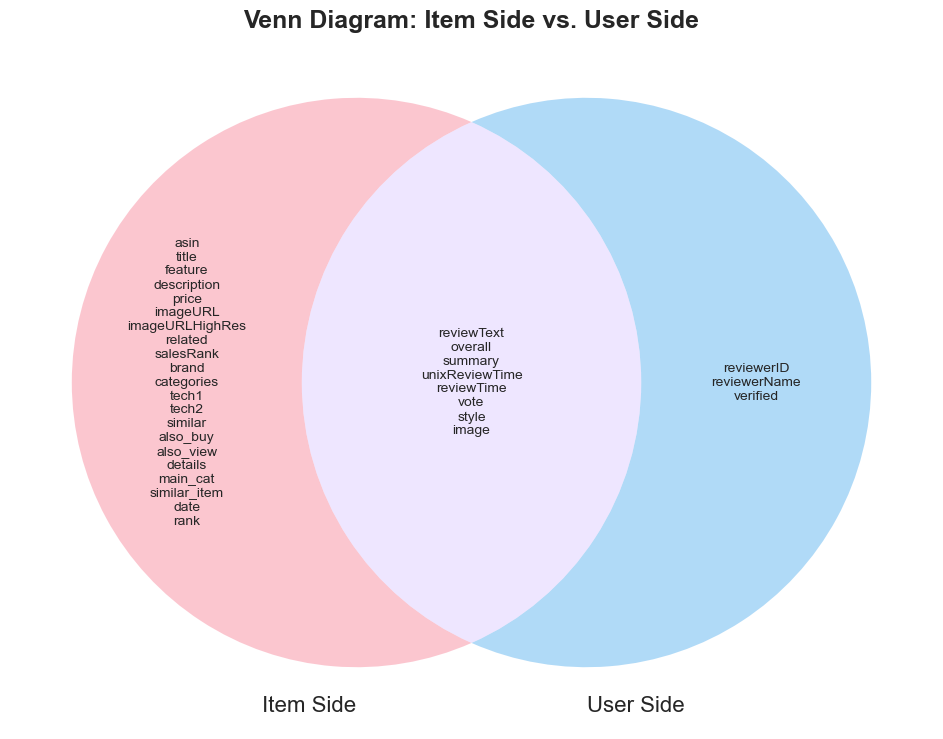

In [13]:
!pip install seaborn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Constants for item side, user side, and interaction side
ITEM_SIDE = [
    'asin', 
    'title', 
    'feature', 
    'description', 
    'price', 
    'imageURL', 
    'imageURLHighRes', 
    'related', 
    'salesRank', 
    'brand', 
    'categories', 
    'tech1', 
    'tech2', 
    'similar', 
    'also_buy', 
    'also_view', 
    'details', 
    'main_cat', 
    'similar_item', 
    'date', 
    'rank'
]

USER_SIDE = [
    'reviewerID', 
    'reviewerName', 
    'verified'
]

INTERACTION_SIDE = [
    'reviewText', 
    'overall', 
    'summary', 
    'unixReviewTime', 
    'reviewTime', 
    'vote', 
    'style', 
    'image'
]

# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


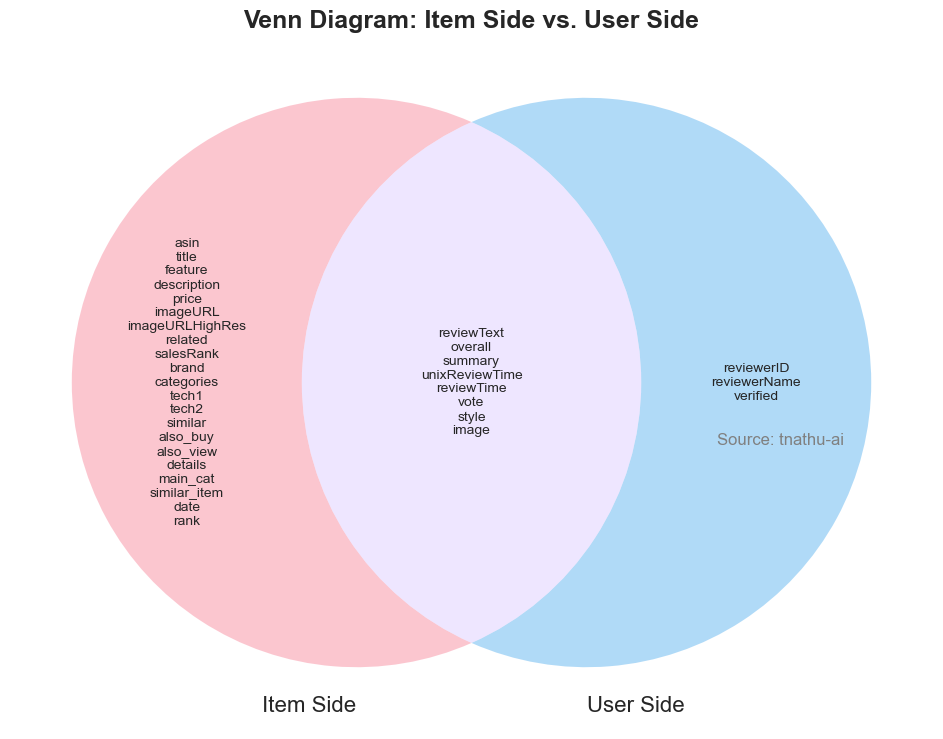

In [14]:
!pip install seaborn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Constants for item side, user side, and interaction side
ITEM_SIDE = [
    'asin', 
    'title', 
    'feature', 
    'description', 
    'price', 
    'imageURL', 
    'imageURLHighRes', 
    'related', 
    'salesRank', 
    'brand', 
    'categories', 
    'tech1', 
    'tech2', 
    'similar', 
    'also_buy', 
    'also_view', 
    'details', 
    'main_cat', 
    'similar_item', 
    'date', 
    'rank'
]

USER_SIDE = [
    'reviewerID', 
    'reviewerName', 
    'verified'
]

INTERACTION_SIDE = [
    'reviewText', 
    'overall', 
    'summary', 
    'unixReviewTime', 
    'reviewTime', 
    'vote', 
    'style', 
    'image'
]

# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Add the source citation in gray
plt.text(0.5, -0.1, "Source: tnathu-ai", fontsize=12, color='gray', ha='center')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.savefig('../images/interaction_venn_diagram.png')  # Save the plot
plt.show()
